In [9]:
import tensorflow as tf
import kapre
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Permute
from kapre.time_frequency import Melspectrogram
from kapre.utils import Normalization2D
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [29]:
def visualise_model(model, logam=False):
    n_ch, nsp_src = model.input_shape[1:]
    src, _ = librosa.load('/Volumes/My Passport/HD externo/1 - Projetos/6 - Sonar/TestDataset/Ruido/ivqufthcrycp.wav', sr=SR, mono=True)
    src = src[:nsp_src]
    src_batch = src[np.newaxis, np.newaxis, :]
    pred = model.predict(x=src_batch)
    if tf.keras.backend.image_data_format() == 'channels_first':
        result = pred[0, 0]
    else:
        result = pred[0, :, :, 0]
    
    if logam:
        result = librosa.power_to_db(result)
    fig, ax = plt.subplots(figsize=(100,16))
    ax.set_title('Normalized Frequency Spectrogram', size=20)
    ax.imshow(result)
    ax.set_ylabel('Mel bins', size=18)
    ax.set_xlabel('Time (10 ms)', size=18)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    plt.show()
    return result

In [30]:
SR = 16000
src = np.random.random((1, SR))
model = Sequential()
model.add(Melspectrogram(sr=SR, n_mels=128, 
          n_dft=8192, n_hop=160, input_shape=src.shape, 
          return_decibel_melgram=True,
          trainable_kernel=False, name='melgram'))
model.add(Normalization2D(str_axis='batch'))
#model.add(Permute((2,1,3)))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
melgram (Melspectrogram)     (None, 128, 100, 1)       67649664  
_________________________________________________________________
normalization2d_9 (Normaliza (None, 128, 100, 1)       0         
Total params: 67,649,664
Trainable params: 67,649,664
Non-trainable params: 0
_________________________________________________________________


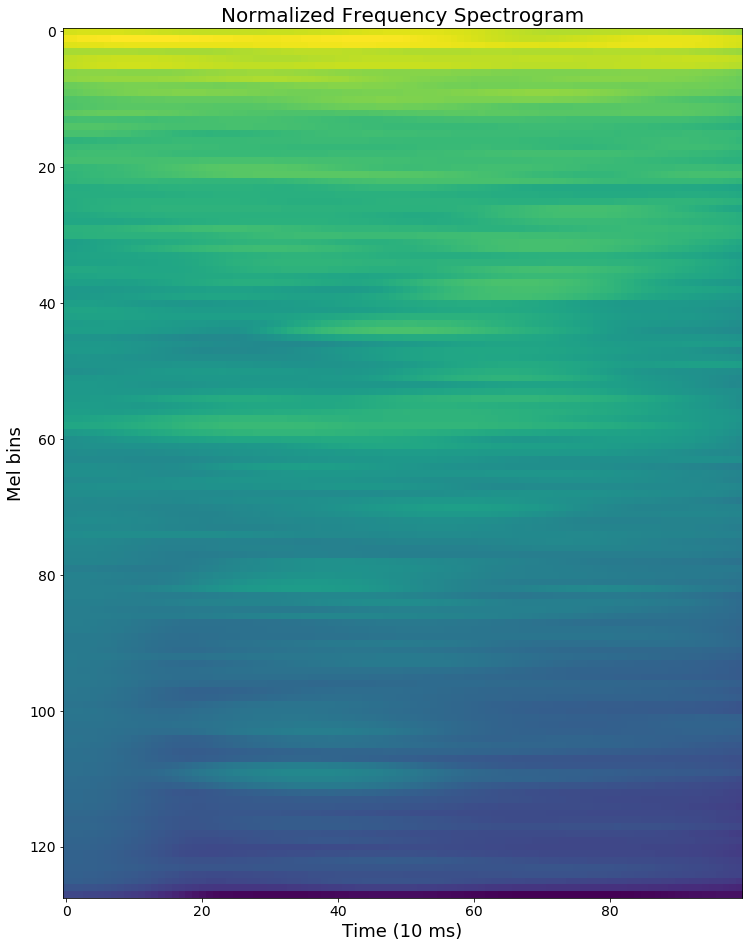

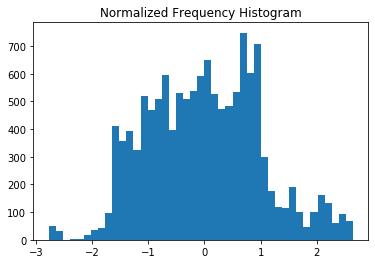

In [31]:
X = visualise_model(model)

plt.title('Normalized Frequency Histogram')
plt.hist(X.flatten(), bins='auto')
plt.show()